# ENTROPY

## EigenVector and EigenValue
Detection of critical events and order-disorder movement


In [ ]:
import pandas as pd

# Load your dataset (assuming you've already loaded it)
matrix = pd.read_csv("/content/drive/MyDrive/Stock Analysis/SP_500/sp500_drop0.8.csv")

# Define window size and shift size
window_size = 20
shift_size = 10

# Initialize a list to store the windows
windows = []

# Iterate through the data with the specified window size and shift size
for i in range(0, len(matrix), shift_size):
    # Extract a window of data
    window = matrix.iloc[i:i+window_size]

    # Check if the window has enough data (20 days)
    if len(window) == window_size:
        windows.append(window)

# Now, the 'windows' list contains the divided windows of data


In [ ]:
windows[0]

,Date,BM_ALB,BM_APD,BM_DD,BM_ECL,BM_EMN,BM_FCX,BM_FMC,BM_IFF,BM_LIN,...,UT_NI,UT_NRG,UT_PCG,UT_PEG,UT_PNW,UT_PPL,UT_SO,UT_SRE,UT_WEC,UT_XEL
0,2005-01-04,-0.041589,-0.019307,-0.021871,-0.012799,-0.093410,-0.040307,-0.045477,-0.028917,-0.014428,...,-0.015769,-0.019966,-0.007600,-0.008476,-0.001360,-0.011188,-0.000605,-0.002483,-0.000594,-0.015097
1,2005-01-05,-0.024405,0.000878,-0.010178,-0.009707,-0.011176,-0.011538,-0.021171,-0.001223,-0.020509,...,-0.005922,-0.012466,-0.012281,-0.013351,-0.022488,-0.014405,-0.006072,-0.012785,-0.007149,-0.011332
2,2005-01-06,0.019186,0.006122,0.011417,0.002952,0.020710,-0.001416,0.016308,0.005614,0.009841,...,0.003648,0.009870,-0.006820,0.002004,-0.009093,-0.006405,-0.006415,0.008912,0.005961,-0.001710
3,2005-01-07,0.003574,0.005392,-0.009540,-0.005913,-0.008194,0.009591,-0.003329,0.007759,-0.000233,...,0.000455,-0.002024,-0.007180,-0.005621,0.007234,-0.004293,0.004586,-0.000555,0.001485,-0.005724
4,2005-01-10,-0.007437,0.000694,0.014686,0.008855,0.002103,-0.005348,-0.004457,0.012482,-0.003504,...,0.000910,0.004044,0.019852,0.010215,0.001859,0.003124,0.007901,0.002770,0.009745,0.013683
5,2005-01-11,-0.010282,-0.018192,-0.020747,-0.008262,-0.008823,0.003662,-0.008522,-0.011516,-0.002578,...,0.010401,-0.016567,-0.008637,-0.009813,-0.007220,0.006799,-0.001212,-0.001107,-0.004123,0.003392
6,2005-01-12,-0.001118,0.012804,0.013535,-0.002670,0.000000,0.013782,0.004718,-0.001207,0.005149,...,0.016064,-0.001760,0.012009,0.009613,-0.003044,0.007331,-0.002731,-0.007506,-0.001476,-0.001129
7,2005-01-13,-0.012947,-0.009455,0.001033,-0.012556,-0.007347,0.012767,-0.000224,-0.010199,-0.015526,...,0.009691,0.006730,0.007016,0.008535,-0.003523,0.013743,-0.003043,0.003343,0.002066,0.009558
8,2005-01-14,-0.035465,0.014843,0.028314,0.012556,-0.002526,0.009606,0.011149,0.012371,0.000237,...,0.006555,-0.001751,0.015083,0.004141,0.002351,0.005859,0.003954,0.011612,0.007053,0.004467
9,2005-01-18,0.010511,0.005876,0.003609,0.016208,-0.002727,0.042514,0.011902,0.012458,0.005201,...,-0.000872,-0.006742,0.005375,0.014654,0.000000,-0.003966,0.007863,0.009030,0.003799,0.012732


In [ ]:
windows[1]

,Date,BM_ALB,BM_APD,BM_DD,BM_ECL,BM_EMN,BM_FCX,BM_FMC,BM_IFF,BM_LIN,...,UT_NI,UT_NRG,UT_PCG,UT_PEG,UT_PNW,UT_PPL,UT_SO,UT_SRE,UT_WEC,UT_XEL
10,2005-01-19,-0.010217,-0.014580,-0.014107,0.001461,0.010672,-0.027602,-0.008803,-0.006449,-0.014010,...,0.001307,-0.007676,0.005642,-0.011313,-0.002586,-0.001893,-0.006649,-0.005190,-0.003214,-0.003857
11,2005-01-20,-0.002057,0.003143,-0.002846,-0.003802,0.018549,-0.010279,-0.011337,0.000718,-0.010577,...,-0.003051,-0.007139,-0.006536,-0.008867,-0.003064,0.003784,-0.002429,-0.002193,-0.005282,-0.004427
12,2005-01-21,0.003816,-0.010514,-0.006330,-0.012679,0.008490,0.015111,-0.005830,-0.009624,-0.005574,...,-0.007452,-0.008995,0.013324,-0.004761,-0.005208,-0.008726,-0.000304,-0.010760,-0.006198,0.000554
13,2005-01-24,-0.003816,-0.013835,-0.014234,-0.008643,-0.004708,0.000268,-0.023895,-0.010695,-0.001946,...,-0.000880,0.006904,0.011696,0.009302,0.010388,0.010047,0.013289,0.004705,0.008255,0.002768
14,2005-01-25,0.003523,0.016122,0.011979,0.002093,0.000566,-0.014292,0.003219,-0.001957,0.003403,...,-0.004855,0.000000,-0.004954,-0.003157,-0.011337,-0.007953,-0.018777,0.001655,-0.007071,-0.007213
15,2005-01-26,0.002049,0.018113,0.000616,0.004471,0.004517,0.012952,0.019551,0.005372,0.017082,...,0.009687,0.007748,0.006407,0.022473,0.005212,0.012093,0.014568,0.011783,0.011173,0.006106
16,2005-01-27,0.000585,-0.004151,-0.003700,-0.002978,0.005991,-0.006455,-0.005871,0.023349,0.015622,...,0.006179,0.008571,0.003188,0.003857,0.008237,0.005246,0.008700,0.006516,0.005831,0.001658
17,2005-01-28,-0.001462,0.008113,0.012687,0.000596,-0.010697,-0.030131,0.049480,0.000238,0.001643,...,-0.007064,0.014607,0.001157,0.004801,-0.004632,0.001493,0.000597,-0.001354,-0.013462,-0.002212
18,2005-01-31,0.027138,0.012641,0.010518,0.002977,0.021466,0.023363,0.016883,0.004272,0.011654,...,0.014516,0.014969,0.011495,0.010481,-0.007169,0.007435,0.008028,0.008635,0.007046,0.007173
19,2005-02-01,0.008226,0.007610,0.022285,0.007991,-0.013386,0.007038,0.017852,0.004254,0.000000,...,0.003487,0.009384,-0.000857,0.015986,-0.007462,0.030996,0.009138,0.004022,0.009319,0.000549


In [ ]:
len(windows)

464

In [ ]:
# Initialize a list to store the last dates
last_dates = []

# Iterate through the list of DataFrames
for window in windows:
    # Extract the last date from the last row of the DataFrame
    last_date = window.iloc[-1]['Date']

    # Append the last date to the list
    last_dates.append(last_date)

# last_dates now contains the last date of each matrix


In [ ]:
last_dates[0]

'2005-02-01'

In [ ]:
len(last_dates)

464

In [ ]:
# Initialize a list to store the correlation matrixes
correlation_coefficients = []

# Iterate through the list of windows
for window in windows:
    # Calculate the correlation matrix for the window
    correlation_matrix = window.corr()

    # Extract the correlation coefficient between two specific columns if needed
    # For example, to get the correlation between column 'A' and 'B':
    # correlation_coefficient = correlation_matrix.loc['A', 'B']

    # Append the entire correlation matrix or specific coefficient(s) to the list
    correlation_coefficients.append(correlation_matrix)

# 'correlation_coefficients' now contains the correlation matrices or specific coefficients for each window


<ipython-input-9-0af958793d2a>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = window.corr()


In [ ]:
correlation_coefficients[0]

,BM_ALB,BM_APD,BM_DD,BM_ECL,BM_EMN,BM_FCX,BM_FMC,BM_IFF,BM_LIN,BM_MLM,...,UT_NI,UT_NRG,UT_PCG,UT_PEG,UT_PNW,UT_PPL,UT_SO,UT_SRE,UT_WEC,UT_XEL
BM_ALB,1.000000,0.396861,0.277885,0.294966,0.667059,0.491739,0.545206,0.415365,0.629027,0.225789,...,0.364902,0.594253,0.098817,0.413240,-0.003594,0.221930,0.158598,0.286558,0.191703,0.359879
BM_APD,0.396861,1.000000,0.780035,0.637368,0.405790,0.349687,0.682316,0.614275,0.576685,0.545225,...,0.323889,0.506044,0.129103,0.496836,-0.092532,0.168278,0.051759,0.399200,0.185704,0.164590
BM_DD,0.277885,0.780035,1.000000,0.706872,0.359630,0.299143,0.706440,0.570987,0.421140,0.601255,...,0.331580,0.598754,0.410267,0.569614,-0.087100,0.382535,0.055291,0.436219,0.282443,0.380651
BM_ECL,0.294966,0.637368,0.706872,1.000000,0.336487,0.339834,0.583412,0.677789,0.497174,0.464692,...,0.251863,0.358328,0.330791,0.543015,0.120286,0.252778,0.261326,0.621782,0.432650,0.493137
BM_EMN,0.667059,0.405790,0.359630,0.336487,1.000000,0.447742,0.484077,0.590682,0.397016,0.256575,...,0.521037,0.473288,0.301910,0.198859,-0.024166,0.183623,0.013347,0.199468,0.118433,0.460245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UT_PPL,0.221930,0.168278,0.382535,0.252778,0.183623,0.316069,0.353481,0.197056,0.283669,0.346034,...,0.594049,0.522878,0.329302,0.647305,0.295775,1.000000,0.528367,0.430973,0.523182,0.493575
UT_SO,0.158598,0.051759,0.055291,0.261326,0.013347,0.416318,0.128962,0.343597,0.415220,0.256292,...,0.266864,0.362892,0.453333,0.651406,0.655241,0.528367,1.000000,0.495521,0.698271,0.542681
UT_SRE,0.286558,0.399200,0.436219,0.621782,0.199468,0.385336,0.406527,0.489873,0.660317,0.424587,...,0.403979,0.564156,0.268391,0.671455,0.463026,0.430973,0.495521,1.000000,0.736271,0.573427
UT_WEC,0.191703,0.185704,0.282443,0.432650,0.118433,0.457629,0.027708,0.404933,0.460450,0.058461,...,0.467157,0.415173,0.438062,0.679447,0.512965,0.523182,0.698271,0.736271,1.000000,0.560234


In [ ]:
# Initialize a list to store the squared correlation matrices
squared_correlation_matrices = []

# Iterate through the list of correlation matrices
for correlation_matrix in correlation_coefficients:
    # Calculate the element-wise square of the correlation matrix
    squared_correlation_matrix = correlation_matrix ** 2

    # Append the squared correlation matrix to the list
    squared_correlation_matrices.append(squared_correlation_matrix)

# 'squared_correlation_matrices' now contains the squared correlation matrices for each window


In [ ]:
squared_correlation_matrices[0]

,BM_ALB,BM_APD,BM_DD,BM_ECL,BM_EMN,BM_FCX,BM_FMC,BM_IFF,BM_LIN,BM_MLM,...,UT_NI,UT_NRG,UT_PCG,UT_PEG,UT_PNW,UT_PPL,UT_SO,UT_SRE,UT_WEC,UT_XEL
BM_ALB,1.000000,0.157499,0.077220,0.087005,0.444968,0.241808,0.297249,0.172528,0.395675,0.050981,...,0.133154,0.353136,0.009765,0.170767,0.000013,0.049253,0.025153,0.082116,0.036750,0.129513
BM_APD,0.157499,1.000000,0.608455,0.406238,0.164666,0.122281,0.465555,0.377334,0.332565,0.297270,...,0.104904,0.256080,0.016668,0.246846,0.008562,0.028317,0.002679,0.159361,0.034486,0.027090
BM_DD,0.077220,0.608455,1.000000,0.499669,0.129334,0.089486,0.499057,0.326026,0.177359,0.361507,...,0.109945,0.358506,0.168319,0.324460,0.007586,0.146333,0.003057,0.190287,0.079774,0.144895
BM_ECL,0.087005,0.406238,0.499669,1.000000,0.113223,0.115487,0.340370,0.459398,0.247182,0.215939,...,0.063435,0.128399,0.109422,0.294866,0.014469,0.063897,0.068292,0.386612,0.187186,0.243184
BM_EMN,0.444968,0.164666,0.129334,0.113223,1.000000,0.200473,0.234331,0.348905,0.157622,0.065831,...,0.271480,0.224001,0.091150,0.039545,0.000584,0.033717,0.000178,0.039788,0.014026,0.211825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UT_PPL,0.049253,0.028317,0.146333,0.063897,0.033717,0.099900,0.124949,0.038831,0.080468,0.119739,...,0.352894,0.273401,0.108440,0.419003,0.087483,1.000000,0.279171,0.185738,0.273719,0.243617
UT_SO,0.025153,0.002679,0.003057,0.068292,0.000178,0.173321,0.016631,0.118059,0.172408,0.065686,...,0.071216,0.131691,0.205511,0.424330,0.429341,0.279171,1.000000,0.245542,0.487583,0.294503
UT_SRE,0.082116,0.159361,0.190287,0.386612,0.039788,0.148484,0.165264,0.239976,0.436019,0.180274,...,0.163199,0.318272,0.072034,0.450851,0.214393,0.185738,0.245542,1.000000,0.542095,0.328818
UT_WEC,0.036750,0.034486,0.079774,0.187186,0.014026,0.209425,0.000768,0.163970,0.212014,0.003418,...,0.218236,0.172369,0.191898,0.461649,0.263133,0.273719,0.487583,0.542095,1.000000,0.313862


In [ ]:
len(squared_correlation_matrices)

464

In [ ]:
import numpy as np

# Initialize lists to store eigenvalues and eigenvectors
eigenvalues_list = []
eigenvectors_list = []

# Iterate through the list of squared correlation matrices
for squared_correlation_matrix in squared_correlation_matrices:
    # Convert the squared correlation matrix to a NumPy array
    matrix = squared_correlation_matrix.to_numpy()

    # Calculate the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(matrix)

    # Append the eigenvalues and eigenvectors to their respective lists
    eigenvalues_list.append(eigenvalues)
    eigenvectors_list.append(eigenvectors)

# 'eigenvalues_list' and 'eigenvectors_list' now contain the eigenvalues and eigenvectors for each squared matrix


In [ ]:
eigenvalues_list[0]

array([ 5.73877389e+01+0.00000000e+00j,  1.76959209e+01+0.00000000e+00j,
        1.46845617e+01+0.00000000e+00j,  1.21648526e+01+0.00000000e+00j,
        1.07888145e+01+0.00000000e+00j,  1.04613706e+01+0.00000000e+00j,
        9.97091456e+00+0.00000000e+00j,  9.31239630e+00+0.00000000e+00j,
        8.50559348e+00+0.00000000e+00j,  8.31674903e+00+0.00000000e+00j,
        7.78825048e+00+0.00000000e+00j,  7.63766154e+00+0.00000000e+00j,
        7.22068396e+00+0.00000000e+00j,  7.07930606e+00+0.00000000e+00j,
        6.60829859e+00+0.00000000e+00j,  6.13091352e+00+0.00000000e+00j,
        5.89219340e+00+0.00000000e+00j,  5.66382827e+00+0.00000000e+00j,
        5.41351966e+00+0.00000000e+00j,  5.06295778e+00+0.00000000e+00j,
        4.90587519e+00+0.00000000e+00j,  4.49929069e+00+0.00000000e+00j,
        4.30575270e+00+0.00000000e+00j,  4.09338683e+00+0.00000000e+00j,
        3.73002304e+00+0.00000000e+00j,  3.38030817e+00+0.00000000e+00j,
        3.29909341e+00+0.00000000e+00j,  3.17689766

In [ ]:
# Find the maximum eigenvalue in eigenvalues_list[0]
max_eigenvalue = max(eigenvalues_list[0])

# Print the maximum eigenvalue
print("Maximum Eigenvalue in eigenvalues_list[0]:", max_eigenvalue)


Maximum Eigenvalue in eigenvalues_list[0]: (57.38773885572069+0j)


In [ ]:
eigenvectors_list[0]

array([[-0.04074287+0.j        , -0.0178404 +0.j        ,
        -0.00733441+0.j        , ..., -0.005091  -0.00408291j,
         0.00660684+0.j        , -0.00949365+0.j        ],
       [-0.07683833+0.j        ,  0.07586034+0.j        ,
         0.05327333+0.j        , ...,  0.004783  -0.0062418j ,
        -0.00793108+0.j        ,  0.00320578+0.j        ],
       [-0.07456326+0.j        , -0.00778431+0.j        ,
         0.04043393+0.j        , ...,  0.00377426-0.00052278j,
        -0.02002271+0.j        ,  0.0191488 +0.j        ],
       ...,
       [-0.06647766+0.j        , -0.0660726 +0.j        ,
        -0.00626091+0.j        , ...,  0.01627   +0.04060089j,
         0.00025389+0.j        , -0.00083506+0.j        ],
       [-0.05326805+0.j        , -0.04779   +0.j        ,
        -0.00972756+0.j        , ..., -0.02625098+0.00957633j,
        -0.0404236 +0.j        ,  0.05557471+0.j        ],
       [-0.05615911+0.j        , -0.09412874+0.j        ,
         0.0257849 +0.j       

In [ ]:
import numpy as np

# Find the maximum eigenvalue and its index in eigenvalues_list[0]
max_eigenvalue_index = np.argmax(eigenvalues_list[0])
max_eigenvalue = eigenvalues_list[0][max_eigenvalue_index]

# Get the corresponding eigenvector from eigenvectors_list[0]
max_eigenvector = eigenvectors_list[0][:, max_eigenvalue_index]

# Print the maximum eigenvalue and its corresponding eigenvector
print("Maximum Eigenvalue in eigenvalues_list[0]:", max_eigenvalue)
print("Corresponding Eigenvector in eigenvectors_list[0]:", max_eigenvector)


Maximum Eigenvalue in eigenvalues_list[0]: (57.38773885572069+0j)
Corresponding Eigenvector in eigenvectors_list[0]: [-0.04074287+0.j -0.07683833+0.j -0.07456326+0.j -0.08298803+0.j
 -0.03172189+0.j -0.05950602+0.j -0.05834422+0.j -0.06669783+0.j
 -0.07332066+0.j -0.04792374+0.j -0.06677334+0.j -0.01289613+0.j
 -0.02831357+0.j -0.05492255+0.j -0.03580728+0.j -0.02252626+0.j
 -0.03431186+0.j -0.05219868+0.j -0.01469379+0.j -0.05142755+0.j
 -0.04485562+0.j -0.04101291+0.j -0.0331293 +0.j -0.03773801+0.j
 -0.04879888+0.j -0.03775356+0.j -0.03880383+0.j -0.02743766+0.j
 -0.0363523 +0.j -0.02492595+0.j -0.03698101+0.j -0.09352888+0.j
 -0.03981874+0.j -0.07537022+0.j -0.039631  +0.j -0.03612348+0.j
 -0.06069377+0.j -0.07971393+0.j -0.08134939+0.j -0.03092383+0.j
 -0.03832507+0.j -0.02521999+0.j -0.02399844+0.j -0.06065378+0.j
 -0.04550158+0.j -0.02313878+0.j -0.04923123+0.j -0.05667143+0.j
 -0.05664534+0.j -0.01931773+0.j -0.02944117+0.j -0.06515761+0.j
 -0.04651378+0.j -0.02617921+0.j -0.07

In [ ]:
eigenvalues_list[1]

array([ 4.83222472e+01+0.00000000e+00j,  1.25376017e+01+0.00000000e+00j,
        1.15007172e+01+0.00000000e+00j,  1.10247474e+01+0.00000000e+00j,
        9.93300646e+00+0.00000000e+00j,  9.68796197e+00+0.00000000e+00j,
        9.03851614e+00+0.00000000e+00j,  8.79652620e+00+0.00000000e+00j,
        8.09172834e+00+0.00000000e+00j,  7.61210109e+00+0.00000000e+00j,
        7.51020982e+00+0.00000000e+00j,  7.43032338e+00+0.00000000e+00j,
        7.03021145e+00+0.00000000e+00j,  6.51552067e+00+0.00000000e+00j,
        6.12138235e+00+0.00000000e+00j,  5.81356743e+00+0.00000000e+00j,
        5.75568718e+00+0.00000000e+00j,  5.72805012e+00+0.00000000e+00j,
        5.48605335e+00+0.00000000e+00j,  5.17061048e+00+0.00000000e+00j,
        4.78891959e+00+0.00000000e+00j,  4.70680230e+00+0.00000000e+00j,
        4.65318848e+00+0.00000000e+00j,  4.30821527e+00+0.00000000e+00j,
        4.10713670e+00+0.00000000e+00j,  4.08351908e+00+0.00000000e+00j,
        3.93788580e+00+0.00000000e+00j,  3.49767965

In [ ]:
# Find the maximum eigenvalue in eigenvalues_list[0]
max_eigenvalue = max(eigenvalues_list[1])

# Print the maximum eigenvalue
print("Maximum Eigenvalue in eigenvalues_list[0]:", max_eigenvalue)


Maximum Eigenvalue in eigenvalues_list[0]: (48.322247163424294+0j)


In [ ]:
eigenvectors_list[1]

array([[-0.06053505+0.00000000e+00j,  0.02823913+0.00000000e+00j,
        -0.02707927+0.00000000e+00j, ...,  0.04188166-2.66771799e-04j,
         0.04188166+2.66771799e-04j,  0.02738583+0.00000000e+00j],
       [-0.06417917+0.00000000e+00j,  0.10154956+0.00000000e+00j,
        -0.06431963+0.00000000e+00j, ...,  0.00594428-2.53889344e-04j,
         0.00594428+2.53889344e-04j,  0.00262284+0.00000000e+00j],
       [-0.05505326+0.00000000e+00j,  0.01913969+0.00000000e+00j,
        -0.04346919+0.00000000e+00j, ..., -0.01475963+8.86505400e-05j,
        -0.01475963-8.86505400e-05j, -0.01092445+0.00000000e+00j],
       ...,
       [-0.06312495+0.00000000e+00j, -0.04360726+0.00000000e+00j,
         0.02228564+0.00000000e+00j, ...,  0.04265811-9.78553820e-04j,
         0.04265811+9.78553820e-04j, -0.00875765+0.00000000e+00j],
       [-0.05370351+0.00000000e+00j, -0.11802448+0.00000000e+00j,
         0.02771075+0.00000000e+00j, ..., -0.00168643+1.72549227e-03j,
        -0.00168643-1.72549227e-03j

In [ ]:
import numpy as np

# Initialize lists to store maximum eigenvalues and corresponding eigenvectors
max_eigenvalues_list = []
max_eigenvectors_list = []

# Iterate through the list of squared correlation matrices
for squared_correlation_matrix in squared_correlation_matrices:
    # Convert the squared correlation matrix to a NumPy array
    matrix = squared_correlation_matrix.to_numpy()

    # Calculate the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(matrix)

    # Find the index of the maximum eigenvalue
    max_eigenvalue_index = np.argmax(eigenvalues)

    # Get the maximum eigenvalue
    max_eigenvalue = eigenvalues[max_eigenvalue_index]

    # Get the corresponding eigenvector
    max_eigenvector = eigenvectors[:, max_eigenvalue_index]

    # Append the maximum eigenvalue and its corresponding eigenvector to the lists
    max_eigenvalues_list.append(max_eigenvalue)
    max_eigenvectors_list.append(max_eigenvector)

# 'max_eigenvalues_list' now contains the maximum eigenvalues, and 'max_eigenvectors_list' contains the corresponding eigenvectors for each squared matrix


In [ ]:
max_eigenvalues_list[0]

(57.38773885572069+0j)

In [ ]:
max_eigenvectors_list[0]

array([-0.04074287+0.j, -0.07683833+0.j, -0.07456326+0.j, -0.08298803+0.j,
       -0.03172189+0.j, -0.05950602+0.j, -0.05834422+0.j, -0.06669783+0.j,
       -0.07332066+0.j, -0.04792374+0.j, -0.06677334+0.j, -0.01289613+0.j,
       -0.02831357+0.j, -0.05492255+0.j, -0.03580728+0.j, -0.02252626+0.j,
       -0.03431186+0.j, -0.05219868+0.j, -0.01469379+0.j, -0.05142755+0.j,
       -0.04485562+0.j, -0.04101291+0.j, -0.0331293 +0.j, -0.03773801+0.j,
       -0.04879888+0.j, -0.03775356+0.j, -0.03880383+0.j, -0.02743766+0.j,
       -0.0363523 +0.j, -0.02492595+0.j, -0.03698101+0.j, -0.09352888+0.j,
       -0.03981874+0.j, -0.07537022+0.j, -0.039631  +0.j, -0.03612348+0.j,
       -0.06069377+0.j, -0.07971393+0.j, -0.08134939+0.j, -0.03092383+0.j,
       -0.03832507+0.j, -0.02521999+0.j, -0.02399844+0.j, -0.06065378+0.j,
       -0.04550158+0.j, -0.02313878+0.j, -0.04923123+0.j, -0.05667143+0.j,
       -0.05664534+0.j, -0.01931773+0.j, -0.02944117+0.j, -0.06515761+0.j,
       -0.04651378+0.j, -

In [ ]:
import numpy as np

# Initialize a list to store the entropies
entropies = []

# Iterate through the list of maximum eigenvalues
for i, max_eigenvalue in enumerate(eigenvalues_list):
    # Calculate the normalized probabilities
    eigenvalue_probabilities = max_eigenvalue / np.sum(max_eigenvalue)

    # Calculate the entropy
    entropy = -np.sum(eigenvalue_probabilities * np.log(eigenvalue_probabilities))

    # Append the entropy to the list
    entropies.append(entropy)

    # Print the entropy for the current matrix
    print(f"Entropy of matrix {i + 1} is {entropy:.2f}")

# 'entropies' now contains the entropy for each matrix based on the maximum eigenvalue, and the output is printed for each matrix


Entropy of matrix 1 is 4.33+0.00j
Entropy of matrix 2 is 4.50+0.00j
Entropy of matrix 3 is 4.28-0.00j
Entropy of matrix 4 is 4.11-0.00j
Entropy of matrix 5 is 4.34+0.00j
Entropy of matrix 6 is 4.30-0.00j
Entropy of matrix 7 is 3.98+0.00j
Entropy of matrix 8 is 4.04-0.00j
Entropy of matrix 9 is 4.21+0.00j
Entropy of matrix 10 is 4.39-0.00j
Entropy of matrix 11 is 4.59-0.00j
Entropy of matrix 12 is 4.32-0.00j
Entropy of matrix 13 is 4.38-0.00j
Entropy of matrix 14 is 4.46-0.00j
Entropy of matrix 15 is 4.39-0.00j
Entropy of matrix 16 is 4.30-0.00j
Entropy of matrix 17 is 4.30-0.00j
Entropy of matrix 18 is 4.48+0.00j
Entropy of matrix 19 is 4.31-0.00j
Entropy of matrix 20 is 4.00+0.00j
Entropy of matrix 21 is 4.21+0.00j
Entropy of matrix 22 is 4.52+0.00j
Entropy of matrix 23 is 4.52-0.00j
Entropy of matrix 24 is 4.48-0.00j
Entropy of matrix 25 is 4.41+0.00j
Entropy of matrix 26 is 4.45-0.00j
Entropy of matrix 27 is 4.57-0.00j
Entropy of matrix 28 is 4.55+0.00j
Entropy of matrix 29 is 4.42-

In [ ]:
entropies[0]

(4.331445978990284+7.800745104854624e-17j)

# Time Series plot of Entropy

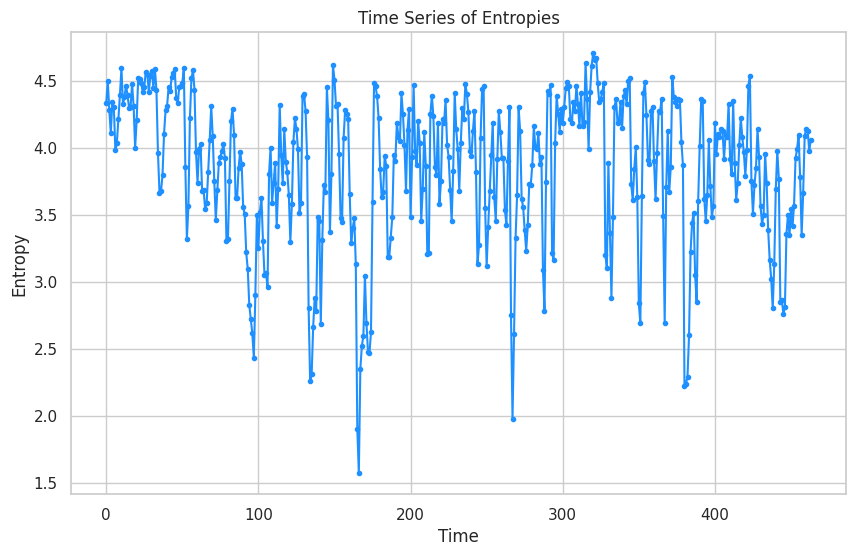

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample time series data (replace with your actual time series data)
time_series = np.arange(len(entropies))  # Replace with your time-related data

# Plot the time series of entropies
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(time_series, entropies, marker='.', linestyle='-', color='dodgerblue')
plt.title('Time Series of Entropies')
plt.xlabel('Time')
plt.ylabel('Entropy')
plt.grid(True)
plt.show()


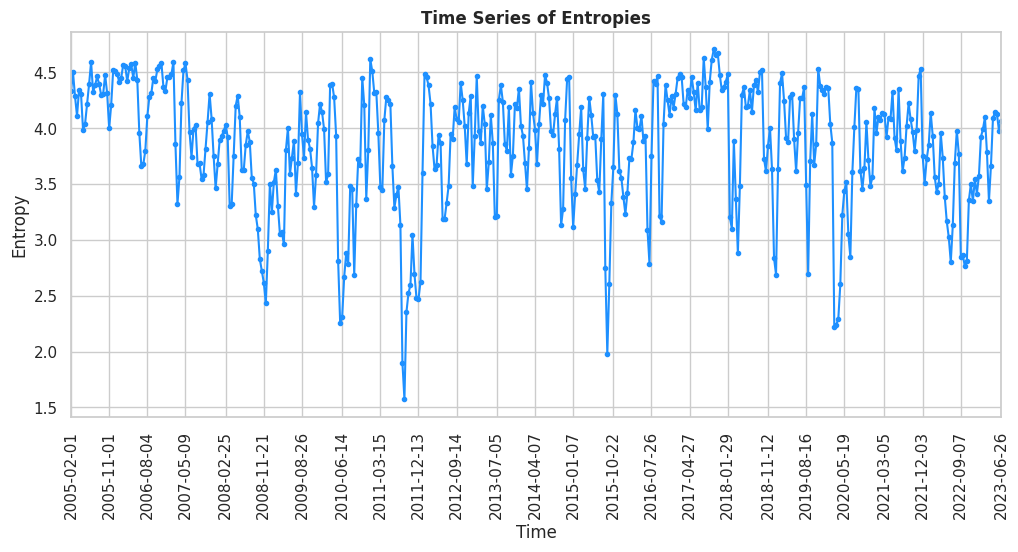

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(12, 5))  # Adjust the figure size to make it more concise
plt.plot(last_dates, entropies, marker='.', linestyle='-', color='dodgerblue')
plt.title('Time Series of Entropies', fontsize=12, fontweight='bold')
plt.xlabel('Time', fontsize=12)  # Adjust x-axis label font size
plt.ylabel('Entropy', fontsize=12)  # Adjust y-axis label font size
plt.grid(True)
plt.xlim(last_dates[0], last_dates[-1])  # Set the x-axis limits based on your data

# Set the x-axis labels with a specified number of ticks
num_ticks = 25  # Adjust the number of ticks as needed
tick_positions = np.linspace(0, len(last_dates) - 1, num_ticks, dtype=int)
plt.xticks([last_dates[i] for i in tick_positions], rotation=90)  # Display labels at specific positions

plt.show()

